# Markov random field modelling

Write a function that, given an input image $D$ and a segmentation, for example $S_{GT} = \{1, 2,3\}$ , produces a histogram of the pixel intensities and histograms of the pixel
intensities divided into segmentation classes.


In [13]:
import numpy as np
import math
import maxflow
import skimage
import scipy.ndimage as snd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

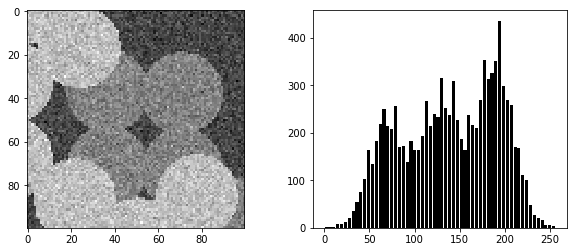

In [11]:
D = skimage.io.imread("noisy_circles.png").astype(np.int);
S = [1, 2, 3]

def Hist(D, S):
    D = 1

f, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(D, cmap='gray');
ax[1].hist(D.ravel(), bins=60, range=[0,256], rwidth=0.8, color='k');

What does this histogram say about the chances of obtaining
a reasonable segmentation of D using a method which considers only
pixel intensities, for example thresholding?

The one clique potentials for the likelihood energy as the squared distance from the
class mean  

$$ 
V_{1}\left(f_{i}\right)=\alpha\left(\mu\left(f_{i}\right)-d_{i}\right)^{2}
 $$
 

## Using PyMaxflow for minimum graph cuts

Let's start with a simple graph, following the tutorial on http://pmneila.github.io/PyMaxflow/tutorial.html

<img src="http://pmneila.github.io/PyMaxflow/_images/graph.png" style="height:250px">   

It has a source node $s$, a sink node $t$ and the two nodes $0$.

In [6]:
# Create the graph with integer capacities.
g = maxflow.Graph[int](2, 2)
# Add two (non-terminal) nodes. Get the index to the first one.
nodes = g.add_nodes(2)
# Create two edges (forwards and backwards) with the given capacities.
# The indices of the nodes are always consecutive.
g.add_edge(nodes[0], nodes[1], 1, 2)
# Set the capacities of the terminal edges
# for the first node:
g.add_tedge(nodes[0], 2, 5)
# for the second node:
g.add_tedge(nodes[1], 9, 4)

In [9]:
flow = g.maxflow()
print("Maximum flow:", flow)

Maximum flow: 8


In [10]:
print("Segment of the node 0:", g.get_segment(nodes[0]))
print("Segment of the node 1:", g.get_segment(nodes[1]))

Segment of the node 0: 1
Segment of the node 1: 0


<img src="http://pmneila.github.io/PyMaxflow/_images/graph2.png" style="height:250px"> 

### Binary image segmentation 

Next, we'll explore how to use the maxflow library to segment a CT scan of a mouse tibia.

In [16]:
boneCT_location = 'data/V12_10X_x502.png'
im = skimage.io.imread(boneCT_location).astype(np.float64)